In [1]:
!pip install MiniSom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

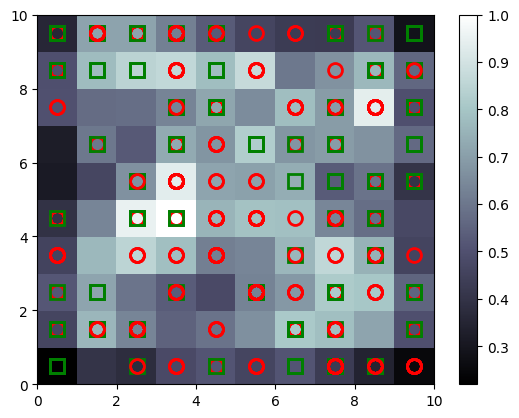

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [10]:
mappings = som.win_map(X)
def reshape_if_needed(array):
    array = np.array(array)  # Ensure it is a numpy array
    if array.ndim == 1:
        return array.reshape(1, -1)
    return array
fraud1 = reshape_if_needed(mappings.get((8, 1), []))
fraud2 = reshape_if_needed(mappings.get((4, 6), []))
if fraud1.size == 0:
    frauds = fraud2
elif fraud2.size == 0:
    frauds = fraud1
else:
    frauds = np.concatenate((fraud1, fraud2), axis=0)
if frauds.size > 0:
    frauds = sc.inverse_transform(frauds)
    # Print the frauds
    print(frauds)
else:
    print("No frauds detected.")

[[1.5692430e+07 1.0000000e+00 2.1170000e+01 2.5000000e-01 1.0000000e+00
  8.0000000e+00 8.0000000e+00 2.5000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0500000e+02]
 [1.5636626e+07 1.0000000e+00 6.2750000e+01 7.0000000e+00 2.0000000e+00
  1.0000000e+01 9.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.3000000e+01]
 [1.5649101e+07 1.0000000e+00 2.3920000e+01 5.8500000e-01 1.0000000e+00
  1.3000000e+01 8.0000000e+00 1.2500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.4000000e+02 2.0000000e+00]
 [1.5643574e+07 1.0000000e+00 2.1170000e+01 8.7500000e-01 1.0000000e+00
  8.0000000e+00 8.0000000e+00 2.5000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0500000e+02]
 [1.5600027e+07 1.0000000e+00 2.9830000e+01 2.0400000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 4.0000000e-02 0.0000000e+00 0.

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15692430
15636626
15649101
15643574
15600027


In [13]:
customers = dataset.iloc[:, 1:].values

In [14]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [16]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [18]:
ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 6s 3ms/step - loss: 0.8166 - accuracy: 0.6333
Epoch 2/10
690/690 [==============================] - 2s 3ms/step - loss: 0.4197 - accuracy: 0.9464
Epoch 3/10
690/690 [==============================] - 2s 3ms/step - loss: 0.2688 - accuracy: 0.9870
Epoch 4/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1885 - accuracy: 0.9928
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1399 - accuracy: 0.9928
Epoch 6/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1088 - accuracy: 0.9928
Epoch 7/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0884 - accuracy: 0.9928
Epoch 8/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0748 - accuracy: 0.9928
Epoch 9/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0657 - accuracy: 0.9928
Epoch 10/10
690/690 [==============================] - 2s 2ms/step - loss: 0.0594 - accuracy: 0.9928

In [23]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 4ms/step


In [24]:
print(y_pred)

[[1.57761560e+07 3.14667486e-02]
 [1.56365620e+07 3.14667486e-02]
 [1.57025710e+07 3.14667486e-02]
 ...
 [1.57997850e+07 3.69380862e-02]
 [1.57901130e+07 4.34598327e-02]
 [1.56058720e+07 4.39100713e-02]]
